In [66]:
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.stattools import jarque_bera
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import truncnorm
from scipy import stats
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
import scipy.stats as st


# 2.1

Пусть задано две вектора ответов: y — истинный вектор ответов для некоторой выборки, а также есть вектор ответов \hat{y} --- некоторой предсказательной модели. Наблюдатель хочет проверить гипотезу о том, что ровно в 25% случаев модель дает заниженные оценки. Предложите метод проверки данной гипотезы: запишите задачу формально, предложите статистику для решения данной задачи на уровне значимости alpha = 0.05. Также найдите зависимость мощности данного критерия в зависимости от истинного процента заниженных ответов.

Применим двухвыборочный критерий знаков. Уровень значимости $\alpha = 0.05$.

$$y = X_{1}^{n}, \hat{y} = X_{2}^{n}$$
$$X_{1}^{n}=\left(X_{11}, \ldots, X_{1 n}\right)$$
$$X_{2}^{n}=\left(X_{21}, \ldots, X_{2 n}\right), X_{1 i} \neq X_{2 i}$$
Выборки связные 
$$H_{0}: \mathbf{P}\left(X_{1}>X_{2}\right)=\frac{1}{4}$$
$$H_{1}: \mathbf{P}\left(X_{1}>X_{2}\right)\neq\frac{1}{4}$$
Статистика: $$T\left(X_{1}^{n}, X_{2}^{n}\right)=\sum_{i=1}^{n}\left[X_{1 i}>X_{2 i}\right]$$
Нулевое распределение: $$\operatorname{Bin}\left(n, \frac{1}{4}\right)$$

In [82]:
from statsmodels.stats.proportion import binom_test
sample_size = 100
p = 0.25
neg = int(p*sample_size)
x1 = np.zeros(sample_size)
x2 = np.append(-np.ones(neg), np.ones(sample_size-neg))

Найдем зависимость мощности криетрия в зависимости от истинного значения параметра $p$. Заметим, что как и ожидалось имеется пик (вниз) при $p=0.25$. Видно, что критерий имеет смысл применять только если ожидается найти значительное отличние от закона $p=0.25$. Например, $p < 0.15$ или $p > 0.35$.

In [83]:
p = np.linspace(0, 1, 100)
p_val = []
for i in range(len(p)):
    neg = int(p[i]*sample_size)
    p_val.append(binom_test(neg, sample_size, prop=0.25, alternative='two-sided'))

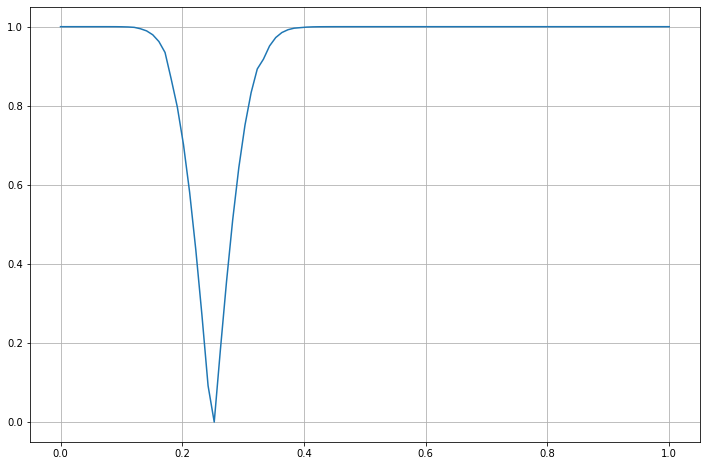

In [84]:
plt.figure(figsize=(12,8))
plt.plot(p, 1-np.array(p_val))
plt.grid()